/Users/sw.jin/Documents/projects/wf/workspace/venv/lib/python3.12/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.Byte

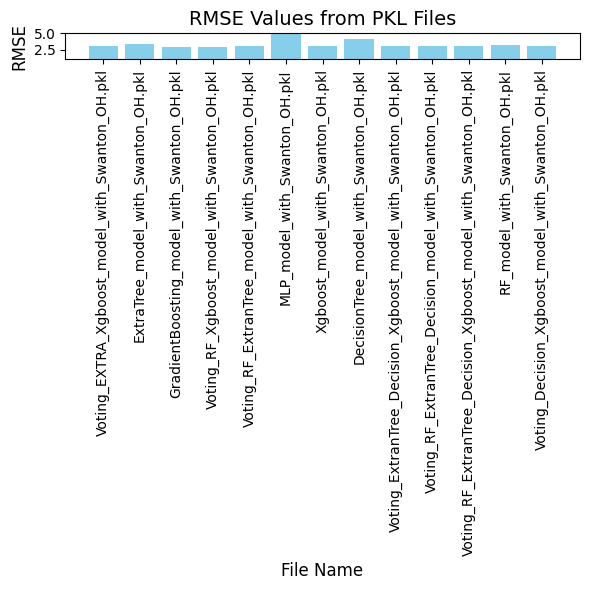

In [15]:
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self, input_size, hidden_layers, output_size):
        super(MLP, self).__init__()
        layers = []
        in_size = input_size
        for h in hidden_layers:
            layers.append(nn.Linear(in_size, h))
            layers.append(nn.ReLU())
            in_size = h
        layers.append(nn.Linear(in_size, output_size))
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

from utils.get_models_from_result import load_rmse_from_pkl, plot_rmse
import xgboost

import matplotlib.pyplot as plt

remse_datss = load_rmse_from_pkl('result_model/Swanton_OH')
# 파일 이름과 RMSE 값 분리
files = list(remse_datss.keys())
rmse_values = list(remse_datss.values())

# 그래프 그리기
plt.figure(figsize=(6, 15))
plt.bar(files, rmse_values, color='skyblue')
plt.xlabel('File Name', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.title('RMSE Values from PKL Files', fontsize=14)
# y축 범위 설정
plt.ylim(1, 5)
# x축 파일 이름이 잘 보이게 회전
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()